## Group3 - Replication_1
#### Members
1. Andrea Ulloa (20172597)
2. Ana Angulo (20171627)
3. Angela Coapaza (20171636) 


## Question 1:

## An Inferencial Problem: The College-Educated Wage Gap
Using the data from the March Supplement of the U.S. Current Population Survey (2015) , in  this lab, we are going to focus in  payments of the college-educated workers and answer the following inference question:

What is the difference in predicted wages between workers with some college education (scl) versus college graduate workers(clg)?

To investigate the College-Educated Wage Gap, we consider the following log-linear regression model:

\begin{align}
\log(Y) &= \beta'X + \epsilon\\
&= \beta_1 SCL  + \beta_2 CLG + \beta_3'W  + \epsilon,
\end{align}

Where  SCL is the indicator of workers with some college education( 1  if yes 0  otherwise), CLG is the indicator of college graduate workers (1  if yes 0  otherwise) and the  𝑊 's are controls explaining variation in wages. Considering transformed wages by the logarithm, we are analyzing the relative difference in the payment of workers with some college education and college graduate workers. 


## Data Analysis

We consider the same subsample of the U.S. Current Population Survey (2015). Let us load the data set.

In [62]:
load("../../data/wage2015_subsample_inference.Rdata")
attach(data) 

dim(data)

The following objects are masked from data (pos = 14):

    ad, clg, exp1, exp2, exp3, exp4, hsg, ind, ind2, lwage, mw, ne,
    occ, occ2, scl, sex, shs, so, wage, we




[1] 5150   20

***Variable description***

- occ : occupational classification
- ind : industry classification
- lwage : log hourly wage
- sex : gender (1 female) (0 male)
- shs : some high school
- hsg : High school graduated
- scl : Some College
- clg: College Graduate
- ad: Advanced Degree
- ne: Northeast
- mw: Midwest
- so: South
- we: West
- exp1: experience

In [63]:
colnames(data)  #allows to obtain the name of each variable of the base

[1] "wage"  "lwage" "sex"   "shs"   "hsg"   "scl"   "clg"   "ad"    "mw"   
[10] "so"    "we"    "ne"    "exp1"  "exp2"  "exp3"  "exp4"  "occ"   "occ2" 
[19] "ind"   "ind2"

As we mention before, we focus only on a subset of the data. For this porpouse, we use scl and clg variables.

In [64]:
data <- data[data$scl==1 |data$clg==1,]
dim(data)
data

[1] 3068   20

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
10,9.615385,2.263364,1,0,0,0,1,0,0,0,0,1,7.0,0.4900,0.343000,0.24010000,3600,11,8370,18
12,48.076923,3.872802,0,0,0,0,1,0,0,0,0,1,31.0,9.6100,29.791000,92.35210000,3050,10,5070,9
19,28.846154,3.361977,1,0,0,0,1,0,0,0,0,1,22.0,4.8400,10.648000,23.42560000,2015,6,9470,22
30,11.730769,2.462215,1,0,0,0,1,0,0,0,0,1,1.0,0.0100,0.001000,0.00010000,1650,5,7460,14
71,19.230769,2.956512,1,0,0,0,1,0,0,0,0,1,4.0,0.1600,0.064000,0.02560000,3255,10,8190,18
84,12.019231,2.486508,1,0,0,1,0,0,0,0,0,1,5.5,0.3025,0.166375,0.09150625,3600,11,8270,18
89,13.461538,2.599837,1,0,0,1,0,0,0,0,0,1,20.5,4.2025,8.615125,17.66100625,3645,11,8190,18
96,16.346154,2.793993,1,0,0,0,1,0,0,0,0,1,25.0,6.2500,15.625000,39.06250000,110,1,7870,17
119,8.653846,2.158004,0,0,0,1,0,0,0,0,0,1,3.5,0.1225,0.042875,0.01500625,7410,20,570,3


In [6]:
To start our (causal) analysis, we compare the sample means given gender:

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected symbol
1: To start
       ^


In [65]:
install.packages("xtable")
library(xtable)
#we select the objects that we are going to use
Z <- data[which(colnames(data) %in% c("lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"))]
dim(Z)

Warning message:
"package 'xtable' is in use and will not be installed"


[1] 3068   12

In [10]:
#Then, we filter the database again according to the gender of the individual

data_female <- data[data$sex==1,]     #allows to filter the database
Z_female <- data_female[which(colnames(data) %in% c("lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"))]


data_male <- data[data$sex==0,]
Z_male <- data_male[which(colnames(data) %in% c("lwage","sex","shs","hsg","scl","clg","ad","ne","mw","so","we","exp1"))]

table <- matrix(0, 12, 3)
table[1:12,1]   <- as.numeric(lapply(Z,mean))
table[1:12,2]   <- as.numeric(lapply(Z_male,mean))
table[1:12,3]   <- as.numeric(lapply(Z_female,mean))
rownames(table) <- c("Log Wage","Sex","Less then High School","High School Graduate","Some College","Gollage Graduate","Advanced Degree", "Northeast","Midwest","South","West","Experience")
colnames(table) <- c("All","Male","Female")
tab<- xtable(table, digits = 4)
tab

,All,Male,Female
,<dbl>,<dbl>,<dbl>
Log Wage,3.0000223,3.0384121,2.9569035
Sex,0.4709909,0.0000000,1.0000000
Less then High School,0.0000000,0.0000000,0.0000000
High School Graduate,0.0000000,0.0000000,0.0000000
Some College,0.4667536,0.4818238,0.4498270
Gollage Graduate,0.5332464,0.5181762,0.5501730
Advanced Degree,0.0000000,0.0000000,0.0000000
Northeast,0.2659713,0.2612446,0.2712803
Midwest,0.2858540,0.2908195,0.2802768


In particular, the table above shows that the difference in average logwage between men and women for the subset of college-educated workers is equal to  0,0815 . Also, we can notice that other education dimensions are zero since we have restricted the database to people with only college education.

In [66]:
mean(data_male$lwage)-mean(data_female$lwage)

ERROR: Error in mean(data_male$lwage): objeto 'data_male' no encontrado


In [16]:
x=0.08150855508735955 -0.03834473367441493 
x

[1] 0.04316382

Thus, the unconditional gender wage gap is about  8,2 % for the group of never married workers (women get paid less on average in our sample). In comparison to the general data base, the gender-gap is bigger by  4.32 %.

This unconditional (predictive) effect of gender equals the coefficient $\beta$ in the univariate ols regression of $Y$ on $D$:

\begin{align}
\log(Y) &=\beta D + \epsilon.
\end{align}

We verify this by running an OLS regression in R.

In [176]:
install.packages("sandwich")
library(sandwich)

nocontrol.fit <- lm(data$lwage ~ data$sex) #no control model using lwage and the gender dummy
nocontrol.est <- summary(nocontrol.fit)$coef["data$sex",1]  #column of coefficients but only for the gender variable
HCV.coefs <- vcovHC(nocontrol.fit, type = 'HC');
nocontrol.se <- sqrt(diag(HCV.coefs))[2] # Estimated std errors

# print unconditional effect of gender and the corresponding standard error
cat ("The estimated gender coefficient is",nocontrol.est," and the corresponding robust standard error is",nocontrol.se) 


Warning message:
"package 'sandwich' is in use and will not be installed"


The estimated gender coefficient is -0.08150856  and the corresponding robust standard error is 0.01957965

Next, we run an ols regression of $Y$ on $(D,W)$ to control for the effect of covariates summarized in $W$:

\begin{align}
\log(Y) &=\beta_1 D  + \beta_2' W + \epsilon.
\end{align}

Here, we are considering the flexible model from the previous lab. Hence, $W$ controls for experience, education, region, and occupation and industry indicators plus transformations and two-way interactions. 
It's important to notice that we don't include the education controls since, as seen before, the values related to "shs","hsg","ad" are all $0$.

## OlS regression with controls

In [68]:
flex <- lwage ~ sex + (exp1+exp2+exp3+exp4)*(clg+occ2+ind2+mw+so+we)

#   Note that ()*() operation in formula objects in R creates a formula of the sort:
#  (exp1+exp2+exp3+exp4)+ (shs+hsg+scl+clg+occ2+ind2+mw+so+we) +  (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)
#  This is not intuitive at all, but that's what it does.

control.fit <- lm(flex, data=data)
control.est <- summary(control.fit)$coef[2,1]

summary(control.fit)




Call:
lm(formula = flex, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.87897 -0.27894 -0.00777  0.25823  2.85755 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.4357559  0.5208785   6.596 5.02e-11 ***
sex         -0.0530623  0.0193532  -2.742 0.006149 ** 
exp1        -0.1962420  0.1996670  -0.983 0.325767    
exp2         4.3105015  2.3797581   1.811 0.070197 .  
exp3        -2.3067253  1.0176306  -2.267 0.023480 *  
exp4         0.3513392  0.1382879   2.541 0.011118 *  
clg          0.2498673  0.1237850   2.019 0.043627 *  
occ22        0.2151993  0.1582208   1.360 0.173900    
occ23        0.0487642  0.2095297   0.233 0.815986    
occ24        0.0281449  0.2300084   0.122 0.902619    
occ25       -0.2711807  0.3944166  -0.688 0.491793    
occ26       -0.2000530  0.2705614  -0.739 0.459725    
occ27       -0.1203371  0.4188017  -0.287 0.773875    
occ28       -0.1719401  0.27214

In [69]:
cat("Coefficient for OLS with controls", control.est)

HCV.coefs <- vcovHC(control.fit, type = 'HC');


Coefficient for OLS with controls -0.05306234

In [70]:
control.se <- sqrt(diag(HCV.coefs))[2] # Estimated std errors
cat("The standard error for OLS with controls", control.se)

The standard error for OLS with controls 0.01835285

The estimated regression coefficient $\beta_1\approx-0.053$ measures how our linear prediction of wage changes if we set the gender variable $D$ from 0 to 1, holding the controls $W$ fixed.
We can call this the *predictive effect* (PE), as it measures the impact of a variable on the prediction we make. Overall, we see that the unconditional wage gap of size $8.1$\% for women decreases to about $5.3$\% after controlling for worker characteristics of the subset of college-educated workers.


Next, we are using the Frisch-Waugh-Lovell theorem from the lecture partialling-out the linear effect of the controls via ols.

## Partialling-Out using ols

In [71]:
# models
flex.y <- lwage ~  (exp1+exp2+exp3+exp4)*(clg+occ2+ind2+mw+so+we) # model for Y
flex.d <- sex ~ (exp1+exp2+exp3+exp4)*(clg+occ2+ind2+mw+so+we) # model for D

#Now, we are going to obtain the residuals of each regression.
# partialling-out the linear effect of W from Y
t.Y <- lm(flex.y, data=data)$res

# partialling-out the linear effect of W from D
t.D <- lm(flex.d, data=data)$res

# regression of Y on D after partialling-out the effect of W
partial.fit <- lm(t.Y~t.D)
partial.est <- summary(partial.fit)$coef[2,1]

cat("Coefficient for D via partialling-out", partial.est)

# standard error
HCV.coefs <- vcovHC(partial.fit, type = 'HC')

partial.se <- sqrt(diag(HCV.coefs))[2]

# confidence interval
confint(partial.fit)[2,]     


Coefficient for D via partialling-out -0.05306234

2.5 %      97.5 % 
-0.08957070 -0.01655398

Again, the estimated coefficient measures the linear predictive effect (PE) of $D$ on $Y$ after taking out the linear effect of $W$ on both of these variables. This coefficient equals the estimated coefficient from the ols regression with controls.

We know that the partialling-out approach works well when the dimension of  𝑊  is low in relation to the sample size  𝑛 . When the dimension of  𝑊  is relatively high, we need to use variable selection or penalization for regularization purposes.

In the following, we illustrate the partialling-out approach using lasso instead of ols.

Next, we summarize the results.

In [72]:
table<- matrix(0, 3, 2)
table[1,1]<- nocontrol.est  
table[1,2]<- nocontrol.se   
table[2,1]<- control.est
table[2,2]<- control.se    
table[3,1]<- partial.est  
table[3,2]<- partial.se  

colnames(table)<- c("Estimate","Std. Error")
rownames(table)<- c("Without controls", "full reg", "partial reg")	
tab<- xtable(table, digits=c(3, 3, 4))
tab

,Estimate,Std. Error
,<dbl>,<dbl>
Without controls,-0.08150856,0.01957965
full reg,-0.05306234,0.01835285
partial reg,-0.05306234,0.01835285


It is worth to notice that controlling for worker characteristics increases the gender wage gap from less that 4% to 7%. The controls we used in our analysis include 2 educational attainment indicators (some college, college graduate), 4 region indicators (midwest, south, west, and northeast); a quartic term (first, second, third, and fourth power) in experience and 22 occupation and 23 industry indicators.

Keep in mind that the predictive effect (PE) does not only measures discrimination (causal effect of being female), it also may reflect selection effects of unobserved differences in covariates between men and women in our sample.

# Question 2

## Graphics


Now, we create two databases: "data_scl" and "data_clg" in order to filter the original database and get the actual values in both variables.

In [73]:
data_scl <- data[data$scl==1,]
data_clg <- data[data$clg==1,]

In [74]:
install.packages("dplyr")
library(dplyr)

Tabla_scl=data_scl%>% 
  group_by(exp1) %>% 
  summarise(Promlwageo = mean(lwage))

Tabla_clg=data_clg%>% 
  group_by(exp1) %>% 
  summarise(Promlwageo = mean(lwage))

Warning message:
"package 'dplyr' is in use and will not be installed"


In [81]:
# Installing & Loading the package
library(ggplot2)

# read the data
data # copy applicable path
placementgg <- (data)
head(placementgg)
colnames(placementgg)
str(placementgg)

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
10,9.615385,2.263364,1,0,0,0,1,0,0,0,0,1,7.0,0.4900,0.343000,0.24010000,3600,11,8370,18
12,48.076923,3.872802,0,0,0,0,1,0,0,0,0,1,31.0,9.6100,29.791000,92.35210000,3050,10,5070,9
19,28.846154,3.361977,1,0,0,0,1,0,0,0,0,1,22.0,4.8400,10.648000,23.42560000,2015,6,9470,22
30,11.730769,2.462215,1,0,0,0,1,0,0,0,0,1,1.0,0.0100,0.001000,0.00010000,1650,5,7460,14
71,19.230769,2.956512,1,0,0,0,1,0,0,0,0,1,4.0,0.1600,0.064000,0.02560000,3255,10,8190,18
84,12.019231,2.486508,1,0,0,1,0,0,0,0,0,1,5.5,0.3025,0.166375,0.09150625,3600,11,8270,18
89,13.461538,2.599837,1,0,0,1,0,0,0,0,0,1,20.5,4.2025,8.615125,17.66100625,3645,11,8190,18
96,16.346154,2.793993,1,0,0,0,1,0,0,0,0,1,25.0,6.2500,15.625000,39.06250000,110,1,7870,17
119,8.653846,2.158004,0,0,0,1,0,0,0,0,0,1,3.5,0.1225,0.042875,0.01500625,7410,20,570,3


,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
10,9.615385,2.263364,1,0,0,0,1,0,0,0,0,1,7.0,0.4900,0.343000,0.24010000,3600,11,8370,18
12,48.076923,3.872802,0,0,0,0,1,0,0,0,0,1,31.0,9.6100,29.791000,92.35210000,3050,10,5070,9
19,28.846154,3.361977,1,0,0,0,1,0,0,0,0,1,22.0,4.8400,10.648000,23.42560000,2015,6,9470,22
30,11.730769,2.462215,1,0,0,0,1,0,0,0,0,1,1.0,0.0100,0.001000,0.00010000,1650,5,7460,14
71,19.230769,2.956512,1,0,0,0,1,0,0,0,0,1,4.0,0.1600,0.064000,0.02560000,3255,10,8190,18
84,12.019231,2.486508,1,0,0,1,0,0,0,0,0,1,5.5,0.3025,0.166375,0.09150625,3600,11,8270,18


[1] "wage"  "lwage" "sex"   "shs"   "hsg"   "scl"   "clg"   "ad"    "mw"   
[10] "so"    "we"    "ne"    "exp1"  "exp2"  "exp3"  "exp4"  "occ"   "occ2" 
[19] "ind"   "ind2"

'data.frame':	3068 obs. of  20 variables:
 $ wage : num  9.62 48.08 28.85 11.73 19.23 ...
 $ lwage: num  2.26 3.87 3.36 2.46 2.96 ...
 $ sex  : num  1 0 1 1 1 1 1 1 0 1 ...
 $ shs  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ hsg  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ scl  : num  0 0 0 0 0 1 1 0 1 1 ...
 $ clg  : num  1 1 1 1 1 0 0 1 0 0 ...
 $ ad   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ mw   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ so   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ we   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ne   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ exp1 : num  7 31 22 1 4 5.5 20.5 25 3.5 6.5 ...
 $ exp2 : num  0.49 9.61 4.84 0.01 0.16 ...
 $ exp3 : num  0.343 29.791 10.648 0.001 0.064 ...
 $ exp4 : num  0.2401 92.3521 23.4256 0.0001 0.0256 ...
 $ occ  : Factor w/ 369 levels "10","20","40",..: 159 136 99 86 146 159 164 7 305 196 ...
 $ occ2 : Factor w/ 22 levels "1","2","3","4",..: 11 10 6 5 10 11 11 1 20 15 ...
 $ ind  : Factor w/ 236 levels "370","380","390",..: 204 117 231 176 201 202 201 190 6 210 ...
 $ ind2 

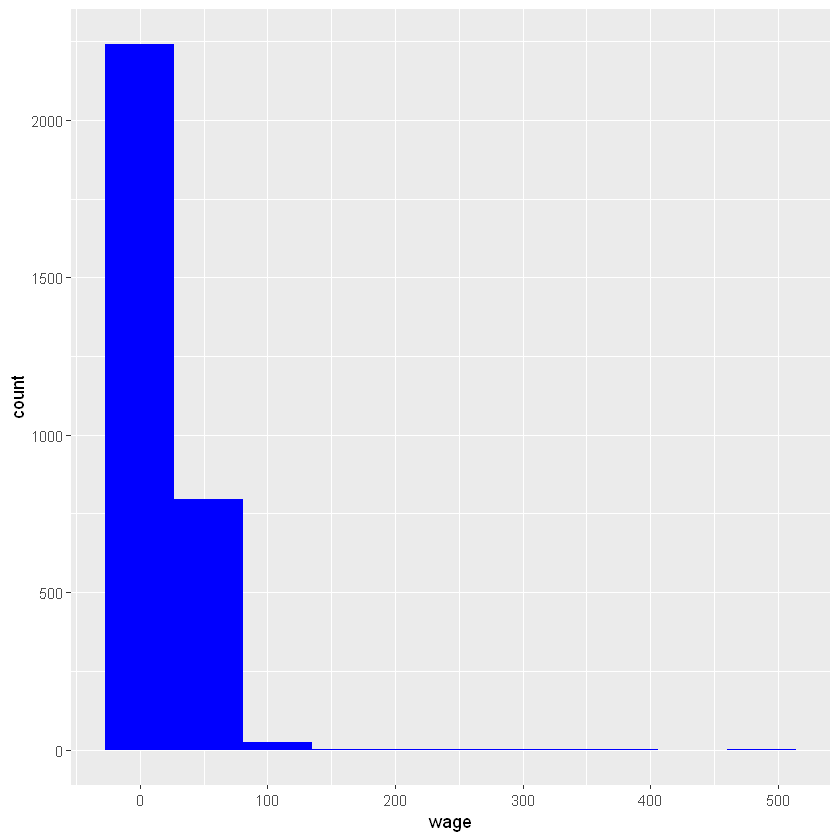

In [106]:
# Histogram for wage
basewage <- ggplot(placementgg, aes(wage))
basewage + geom_histogram(bins = 10, fill = "blue")

We can see that the salary received by most college-educated workers is between 0 and 50 dollars per hour.

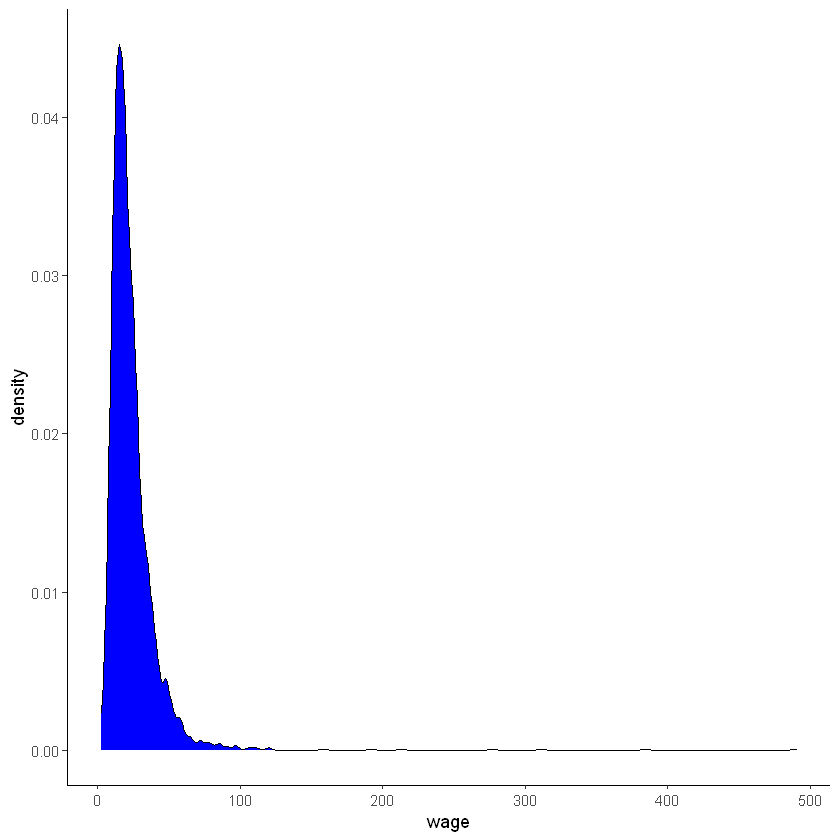

In [133]:
# Density plot for wage
ggplot(placementgg) + geom_density(aes(wage), fill = "blue") + theme_classic()

In [ ]:
Again, we have the same result as before.

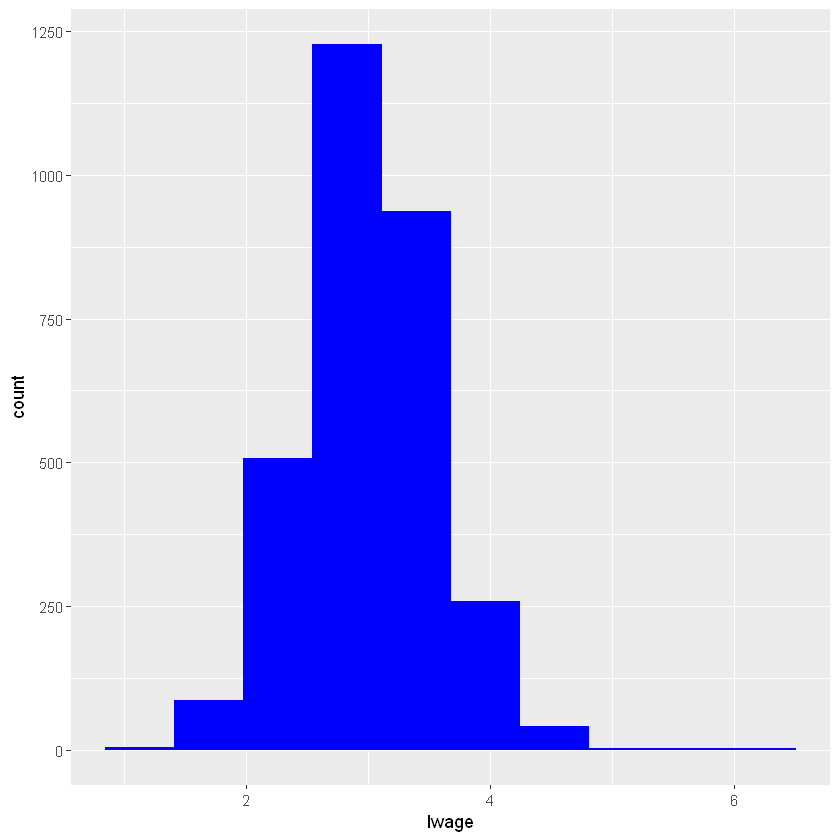

In [134]:
# Histogram for lwage
basewage <- ggplot(placementgg, aes(lwage))
basewage + geom_histogram(bins = 10, fill = "blue")

In the graph, we can see that for most of the individuals considered, the logarithm of the salary is 3.

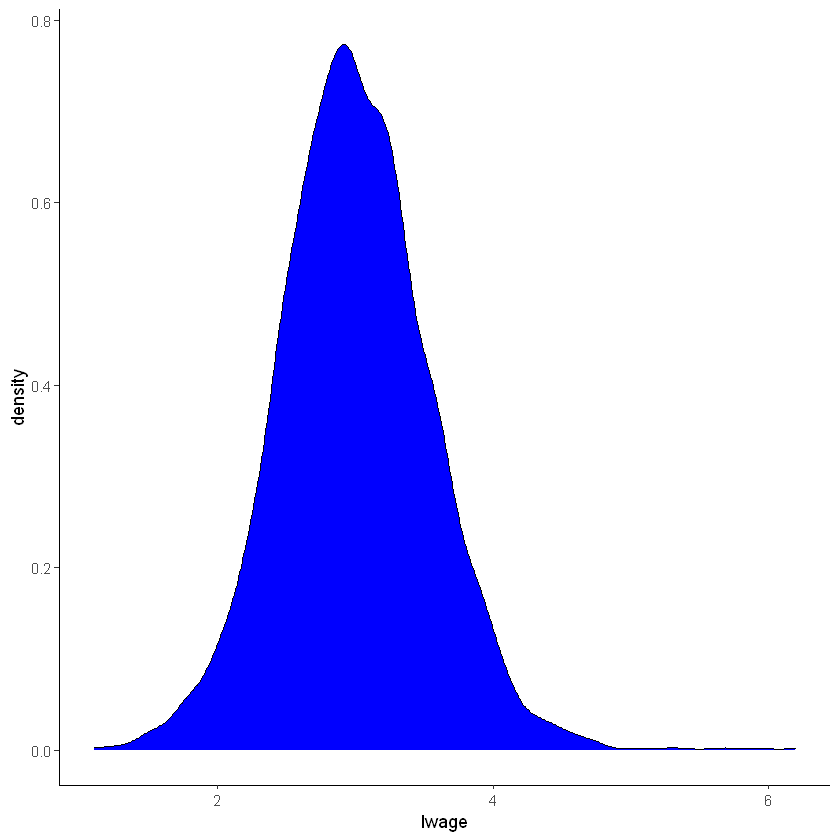

In [155]:
# Density plot for lwage
ggplot(placementgg) + geom_density(aes(lwage), fill = "blue") + theme_classic()

Again, we have the same result as before.

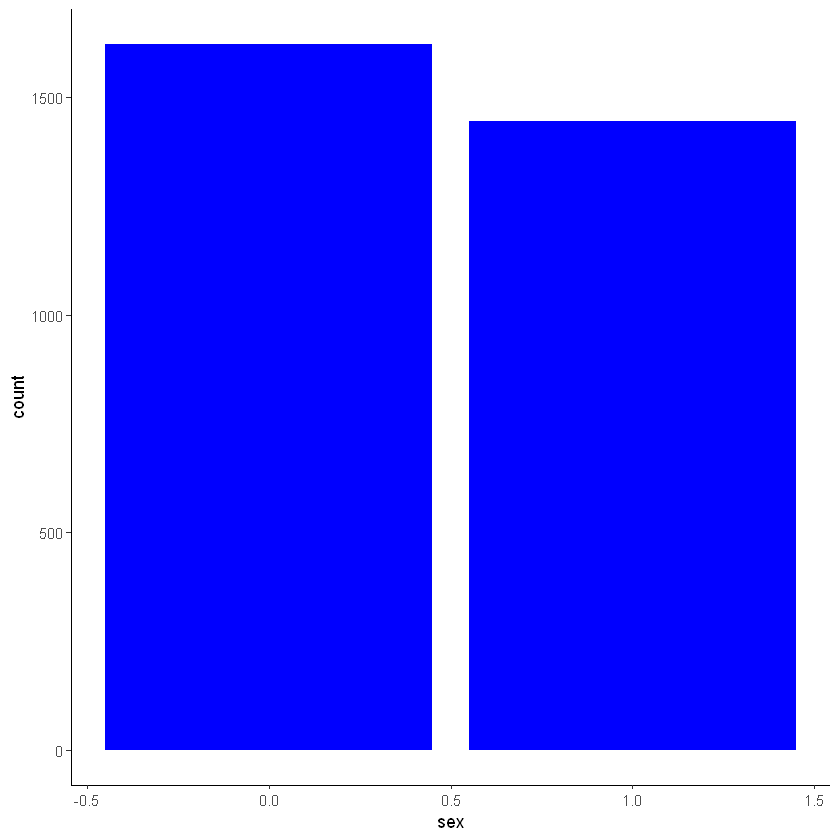

In [165]:
#Bar Chart for sex
basesex <- ggplot(placementgg, aes(sex))
basesex + geom_bar(aes(sex), fill = "blue") + theme_classic()


In this bar chart, we can see that there are  more college-educated male workers than college-educated female workers.

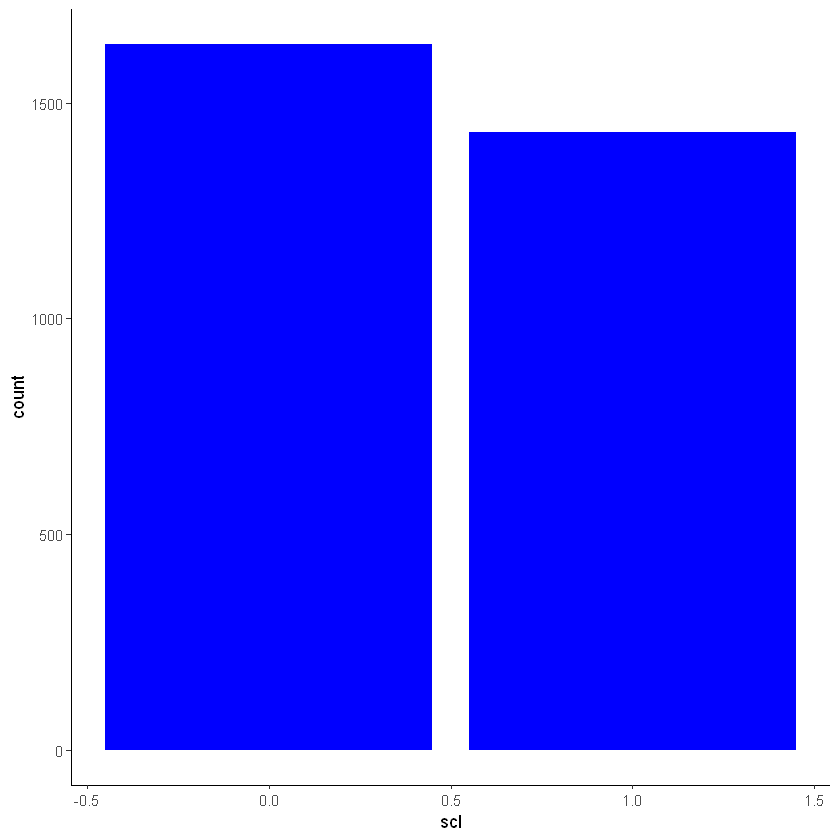

In [166]:
#Bar Chart for scl
basescl <- ggplot(placementgg, aes(scl))
basescl + geom_bar(aes(scl), fill = "blue") + theme_classic()


In this bar chart, we can see that there are  more male workers with some college education than female workers with some college education.

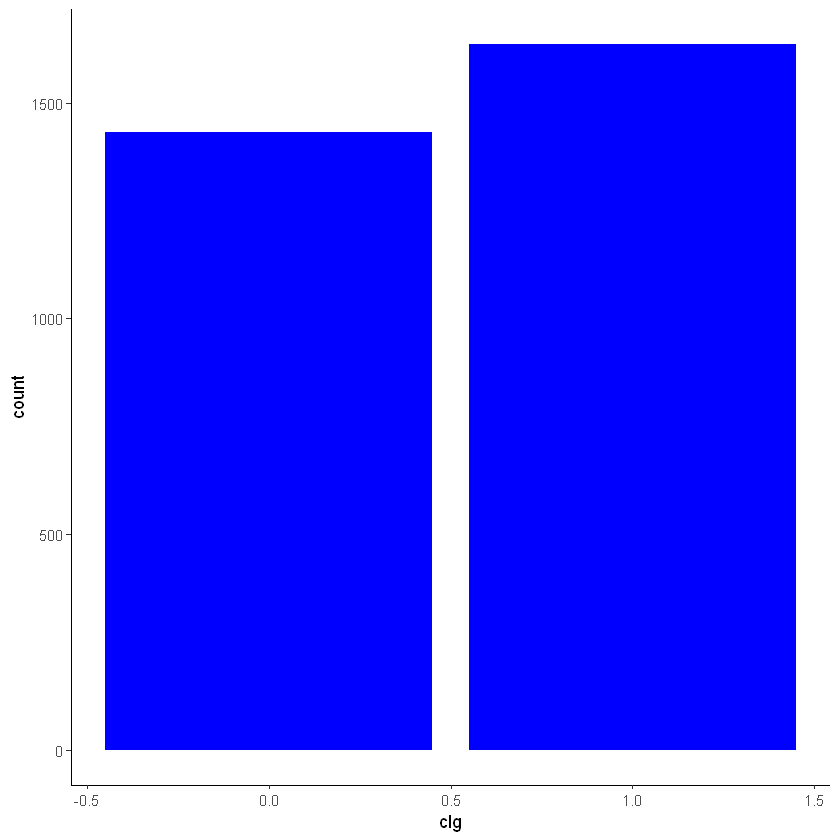

In [168]:
#Bar Chart for clg
baseclg <- ggplot(placementgg, aes(clg))
baseclg + geom_bar(aes(clg), fill = "blue") + theme_classic()

Here, we can see that there are  more college graduate female workers than college graduate male workers.

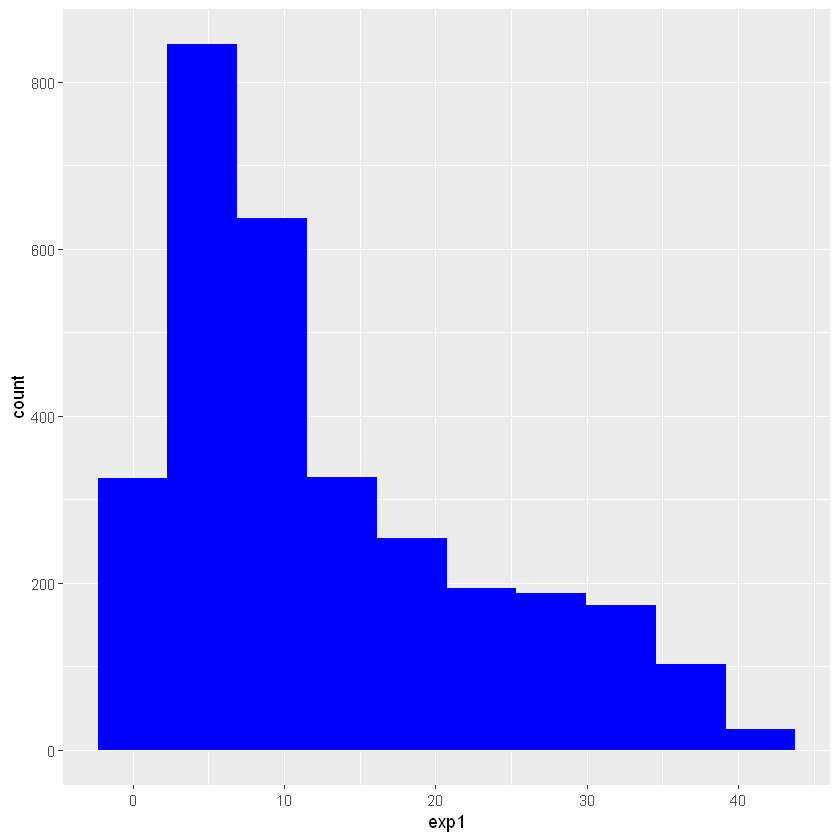

In [170]:

# Histogram for exp1
baseexp1 <- ggplot(placementgg, aes(exp1))
baseexp1 + geom_histogram(bins = 10, fill = "blue")

In this plot, we can see that the potential experience in the labor market for most college-educated workers is between 5 to 10 years.

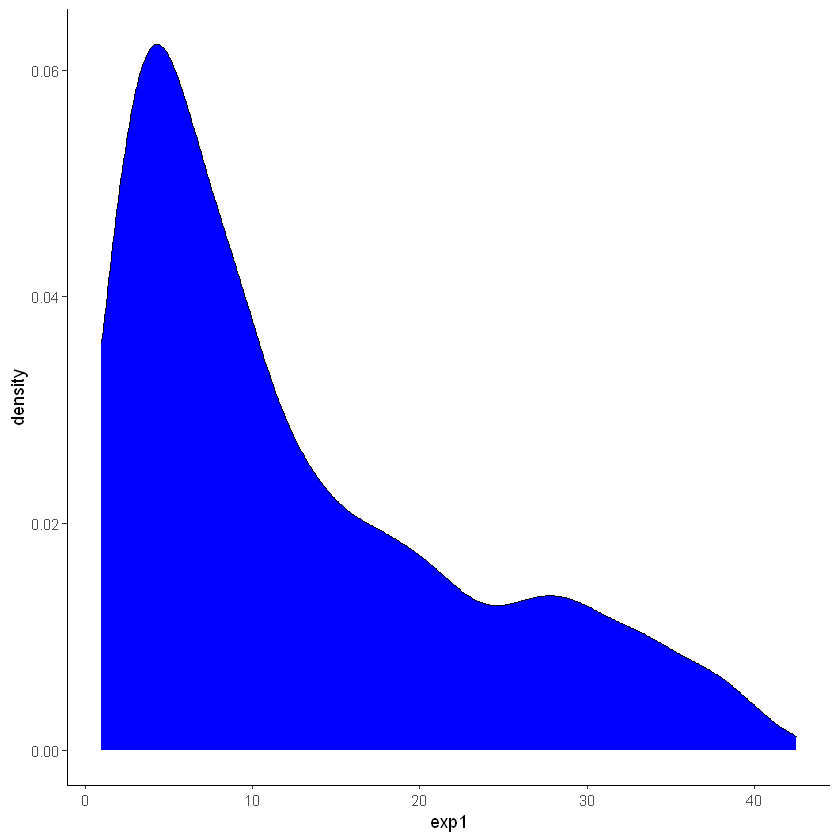

In [171]:
# Density plot for exp1
ggplot(placementgg) + geom_density(aes(exp1), fill = "blue") + theme_classic()

In [ ]:
Again, we have the same result as before.

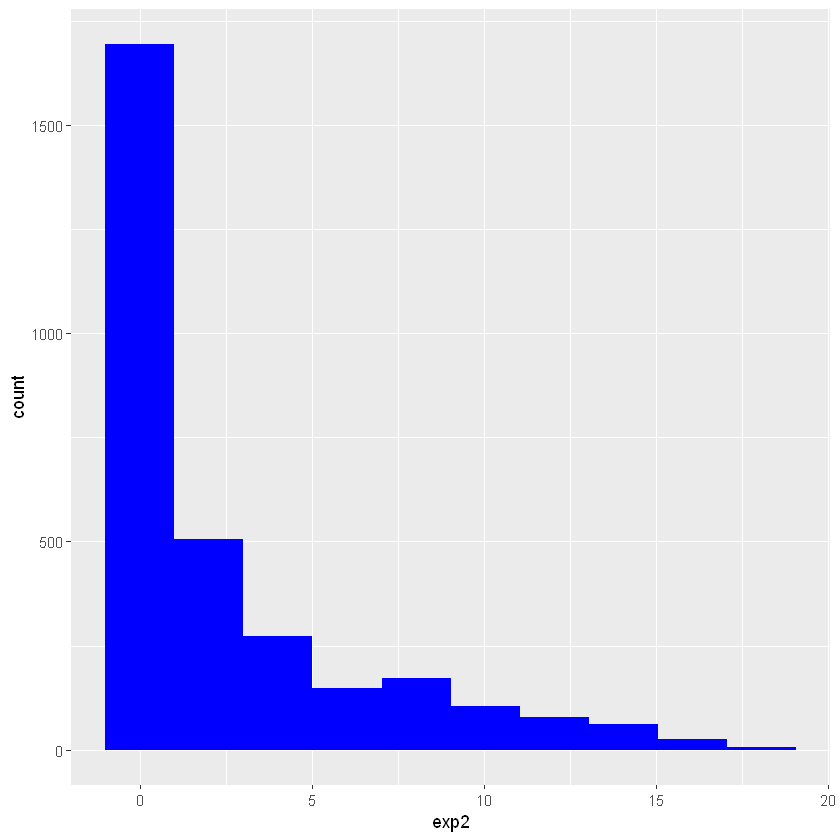

In [172]:
# Histogram for exp2
baseexp2 <- ggplot(placementgg, aes(exp2))
baseexp2 + geom_histogram(bins = 10, fill = "blue")

In this case, we observe that the standard quadratic specification in years of potential experience in the labor market for most college-educated workers is between 0 to 2.5 years.

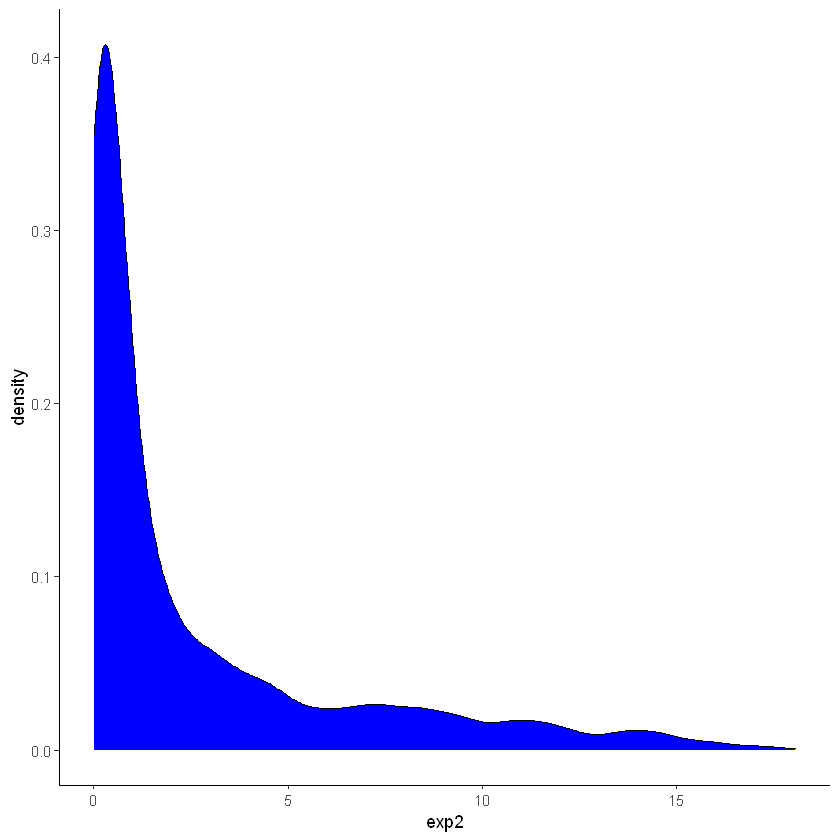

In [173]:
# Density plot for exp2
ggplot(placementgg) + geom_density(aes(exp2), fill = "blue") + theme_classic()

Again, we have the same result as before.

# Question 3: Experience profile and log-wage

The task is to replicate the Figure 11.10 from Lemieux (2006) considering that "you will have only two plotted lines for this college-educated workers". It means we have to plot using the subset of the original data.

First, we are going to estimate the quadratic and quartic approaches

In [20]:
quartic   <- lwage ~  exp1+exp2+exp3+exp4
quadratic <- lwage ~  exp1+exp2

# quartic
quartic_pred <- predict(lm(quartic, data=data_clg))

# quadratic
quadratic_pred <- predict(lm(quadratic, data=data_clg))

# adding predictions
data_clg <- data_clg %>% mutate(lwage_quartic = quartic_pred)
data_clg <- data_clg %>% mutate(lwage_quadratic = quadratic_pred)

In [ ]:
Now, we clean the data

In [22]:
# cleaning data to plot
graph_2 <- data_clg %>% group_by(exp1, clg) %>% 
  summarise_at(vars(lwage, lwage_quartic, lwage_quadratic), mean)
names(graph_2)

[1] "exp1"            "clg"             "lwage"           "lwage_quartic"  
[5] "lwage_quadratic"

Finally, we can plot

Warning message:
"package 'ggplot2' is in use and will not be installed"


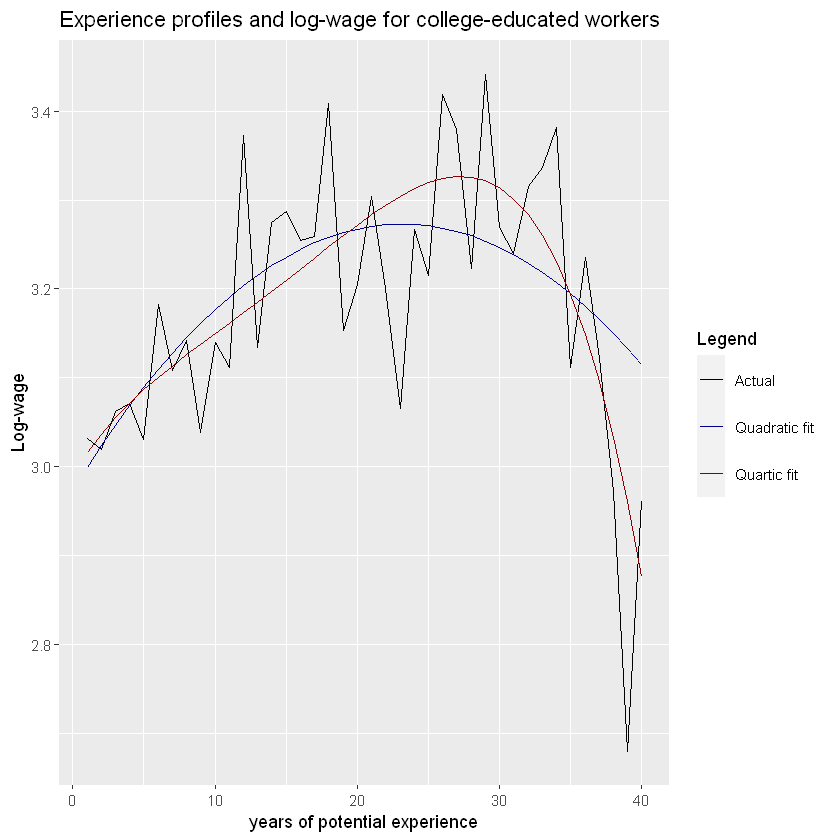

In [32]:
# graph exp vs log-wage


install.packages("ggplot2")
library(ggplot2)
ggplot(graph_2) + geom_line(aes(x=exp1, y=lwage, colour="black")) + 
  geom_line(aes(x=exp1, y=lwage_quadratic, colour="darkblue"), size=0.5) +
  geom_line(aes(x=exp1, y=lwage_quartic, colour="darkred"), size=0.5) +
labs(x = "years of potential experience", 
     y = "Log-wage", 
     size = "Population", 
     title = "Experience profiles and log-wage for college-educated workers") +
theme(legend.key.height = unit(1, 'cm')) +
scale_color_identity(name = "Legend", labels = c("Actual","Quadratic fit", "Quartic fit"),
                     guide = "legend")

We can see that the graph fits better with a quartic prediction. However, the graph shows too much noise. So we can use another technique to collapse the data.

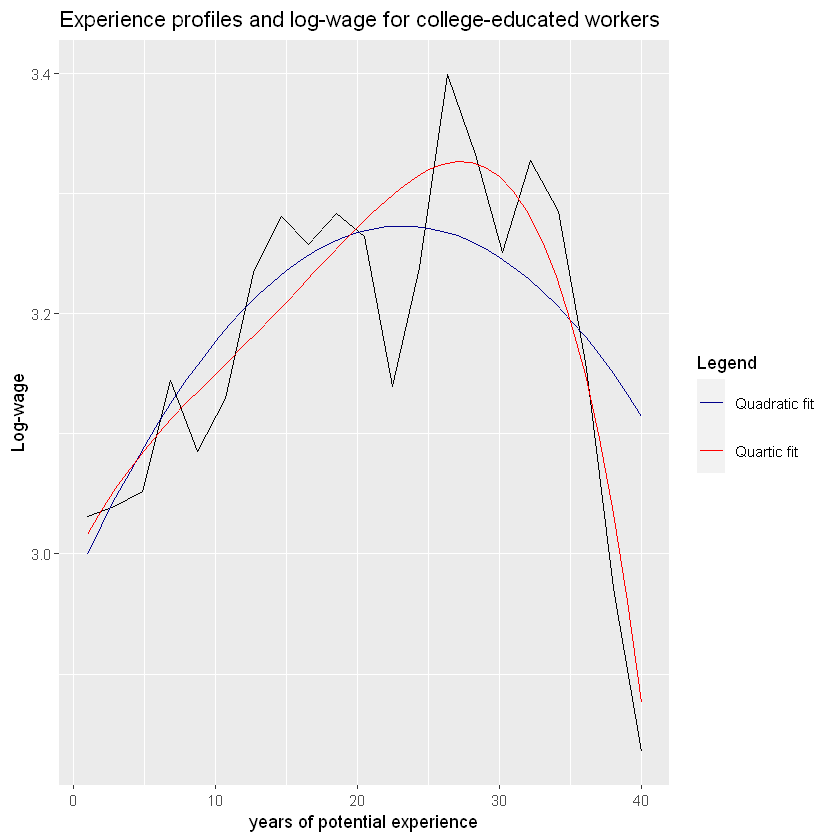

In [33]:
ggplot(NULL,aes(exp1,lwage)) +
stat_summary_bin(data=data_clg, fun='mean', bins=20, color='black', size=0.5, geom='line') +
geom_line(data=data_clg, aes(x=exp1, y=lwage_quadratic, colour="darkblue")) + 
geom_line(data=data_clg, aes(x=exp1, y=lwage_quartic, colour="red")) +
labs(x = "years of potential experience", 
     y = "Log-wage", 
     title = "Experience profiles and log-wage for college-educated workers") +
theme(legend.key.height = unit(1, 'cm')) +
scale_color_identity(name = "Legend", labels = c("Quadratic fit", "Quartic fit"),
                     guide = "legend")

Now it is clear that the relation between experiencie and log-wage fits better to the quartic prediction.

Another way to replicate the Figure 11.10 from Lemieux (2006) is to use the subset data (called *data_clg*). As the Figure 11.10 from Lemieux (2006), we must distinguish the lines between the ones who finished the college (<code>clg==1</code>) and those who didn't (<code>scl==1</code>).

In [36]:
quartic   <- lwage ~ exp1+exp2+exp3+exp4
quadratic <- lwage ~ exp1+exp2

# data for the ones who finished college (clg==1)
data_clg <- data_clg %>% filter(clg==1)
cat("clg =", dim(data_clg), "\n")

# data for those who didn't finish college (scl==1)
data_smclg <- data_scl %>% filter(scl==1)
cat("smclg =", dim(data_smclg), "\n")

# quartic
quartic_pred_clg <- predict(lm(quartic, data=data_clg))
quartic_pred_smclg <- predict(lm(quartic, data=data_smclg))

# quadratic
quadratic_pred_clg <- predict(lm(quadratic, data=data_clg))
quadratic_pred_smclg <- predict(lm(quadratic, data=data_smclg))


# adding predictions
data_clg <- data_clg %>% mutate(lwage_quartic = quartic_pred_clg,
                                lwage_quadratic = quadratic_pred_clg)

data_smclg <- data_smclg %>% mutate(lwage_quartic = quartic_pred_smclg,
                                      lwage_quadratic = quadratic_pred_smclg)

cat("Mean of predicted log-wage for college is ", mean(data_clg$lwage_quartic), "\n")
cat("Mean of predicted log-wage for some college is ", mean(data_smclg$lwage_quartic))

clg = 1636 22 
smclg = 1432 20 
Mean of predicted log-wage for college is  3.13367 
Mean of predicted log-wage for some college is  2.847335

It is important to note that the estimates of the quadratic approach reveals coefficients similar to a linear regression since the squared experience is not close to zero. It means that the quadratic prediction must be a curve.

In [37]:
# revising estimates
quadratic_reg_clg <- lm(quadratic, data=data_clg)
#summary(quadratic_reg_clg)
square_exp_clg <- summary(quadratic_reg_clg)$coef[3,1]
cat("For college workers, the coefficient of the squared experience is:", square_exp_clg, '\n')

quadratic_reg_nonclg <- lm(quadratic, data=data_smclg)
#summary(quadratic_reg_nonclg)
square_exp_nonclg <- summary(quadratic_reg_nonclg)$coef[3,1]
cat("For some-college workers, the coefficient of the squared experience is:", square_exp_nonclg, '\n')

For college workers, the coefficient of the squared experience is: -0.05572554 
For some-college workers, the coefficient of the squared experience is: -0.04378015 


Next, we clean the data before making the plot

In [38]:
data_clg_gr <- data_clg %>% group_by(exp1) %>%  # college
  summarise_at(vars(lwage, lwage_quartic, lwage_quadratic), mean)

data_smclg_gr <- data_smclg %>% group_by(exp1) %>% 
  summarise_at(vars(lwage, lwage_quartic, lwage_quadratic), mean)

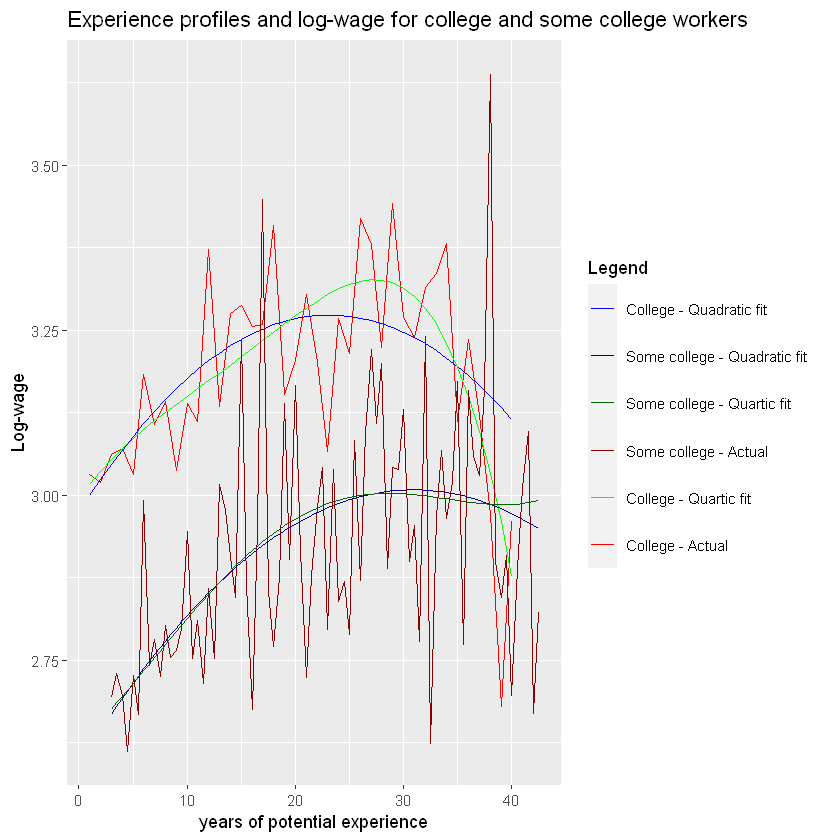

In [39]:
# graph exp vs log-wage (extra exercise)
ggplot()+
# college
geom_line(data=data_clg_gr, aes(x=exp1, y=lwage, colour="red"), size=0.5) + 
geom_line(data=data_clg_gr, aes(x=exp1, y=lwage_quadratic, colour="blue"), size=0.5) +
geom_line(data=data_clg_gr, aes(x=exp1, y=lwage_quartic, colour="green"), size=0.5) + 

# no college
geom_line(data=data_smclg_gr, aes(x=exp1, y=lwage, colour="darkred"), size=0.5) + 
geom_line(data=data_smclg_gr, aes(x=exp1, y=lwage_quadratic, colour="darkblue"), size=0.5) +
geom_line(data=data_smclg_gr, aes(x=exp1, y=lwage_quartic, colour="darkgreen"), size=0.5) +

labs(x = "years of potential experience", 
     y = "Log-wage", 
     size = "Population", 
     title = "Experience profiles and log-wage for college and some college workers") +
theme(legend.key.height = unit(1, 'cm')) +
scale_color_identity(name = "Legend", labels = c("College - Quadratic fit",
                                                 "Some college - Quadratic fit",
                                                 "Some college - Quartic fit",
                                                 "Some college - Actual",
                                                 "College - Quartic fit",
                                                 "College - Actual"),
                     guide = "legend")


From the graph, we can see that fit between log-wage and experience is better when using a quartic regression fot both groups (college and some college).

To smooth the plot, we can use bins.

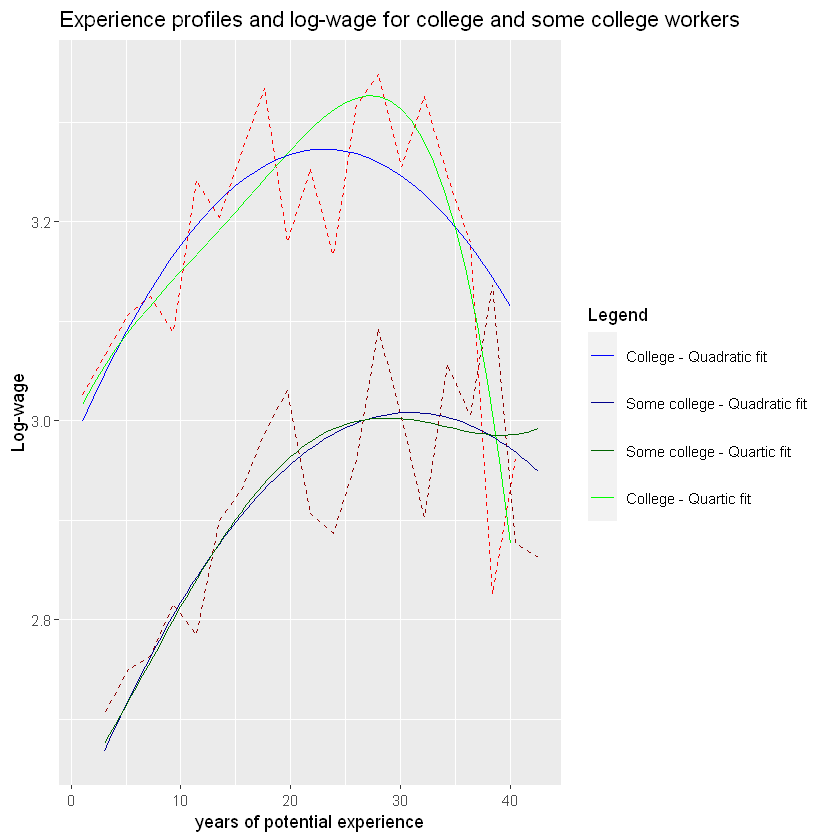

In [40]:
ggplot() +
# college
stat_summary_bin(data=data_clg_gr, aes(x=exp1,y=lwage), fun='mean', bins=20, color='red', 
                 size=0.5, geom='line', linetype="dashed") +
geom_line(data=data_clg_gr, aes(x=exp1, y=lwage_quadratic, colour="blue")) + 
geom_line(data=data_clg_gr, aes(x=exp1, y=lwage_quartic, colour="green")) +
labs(x = "years of potential experience", 
     y = "Log-wage", 
     title = "Experience profiles and log-wage for college and some college workers") +

# some college
stat_summary_bin(data=data_smclg_gr, aes(x=exp1,y=lwage), fun='mean', bins=20, color='darkred', 
                 size=0.5, geom='line', linetype="dashed") +
geom_line(data=data_smclg_gr, aes(x=exp1, y=lwage_quadratic, colour="darkblue")) + 
geom_line(data=data_smclg_gr, aes(x=exp1, y=lwage_quartic, colour="darkgreen")) +

theme(legend.key.height = unit(1, 'cm')) +
scale_color_identity(name = "Legend", labels = c("College - Quadratic fit",
                                                 "Some college - Quadratic fit",
                                                 "Some college - Quartic fit",
                                                 "College - Quartic fit"),
                     guide = "legend")

Once again, it is clear to see that fit between log-wage and experience is better when using a quartic regression fot both groups (college and some college).

## Question 4: Interval confidence of sex's coefficient for different model

In [178]:
install.packages("arm")
library("arm")

package 'arm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\acoap\AppData\Local\Temp\RtmpeuypSG\downloaded_packages


Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Loading required package: lme4


arm (Version 1.12-2, built: 2021-10-15)


Working directory is C:/Users/acoap/Documents/Github_/ECO224/Labs/replication_1



Attaching package: 'arm'


The following object is masked from 'package:xtable':

    display




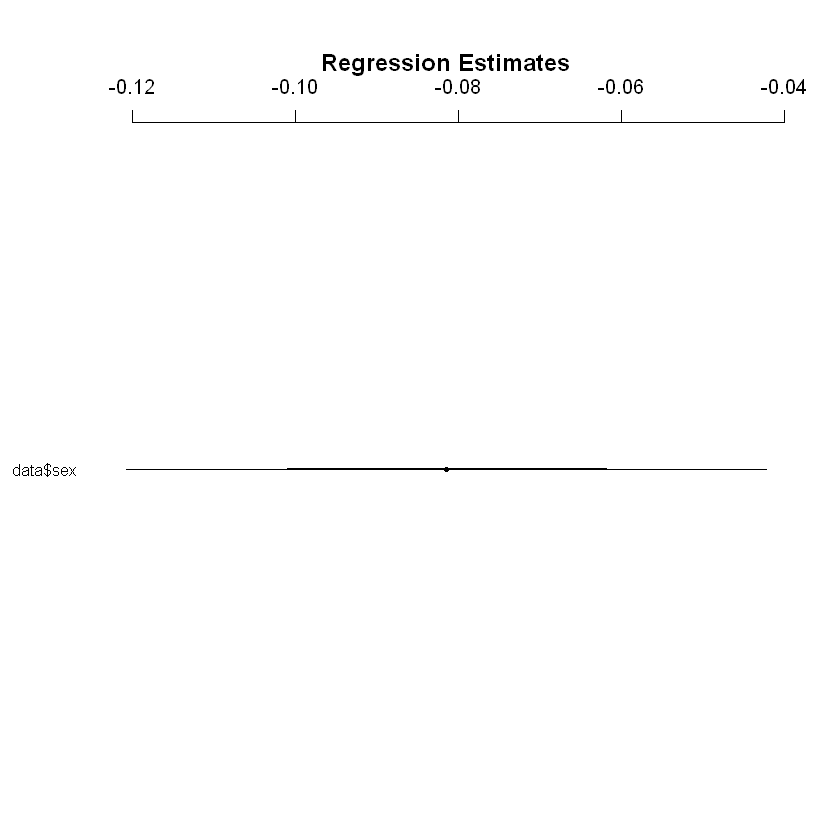

In [189]:
# Interval confidence of sex's coefficient for OLS regression
coefplot(nocontrol.fit)

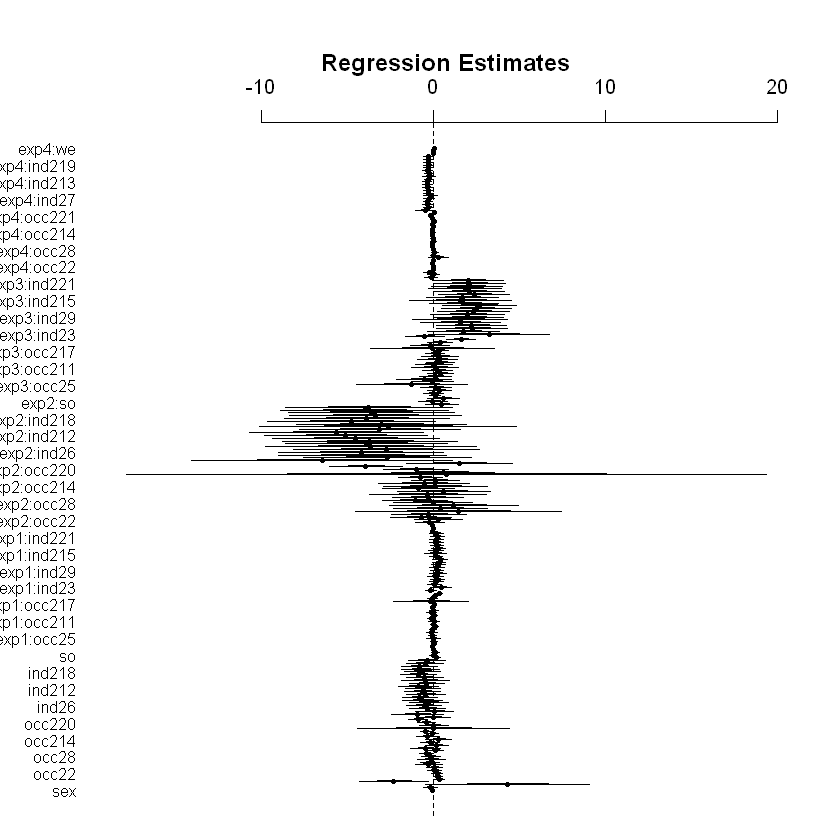

In [187]:
# Interval confidence of sex's coefficient for OLS regression with controls
coefplot(control.fit)

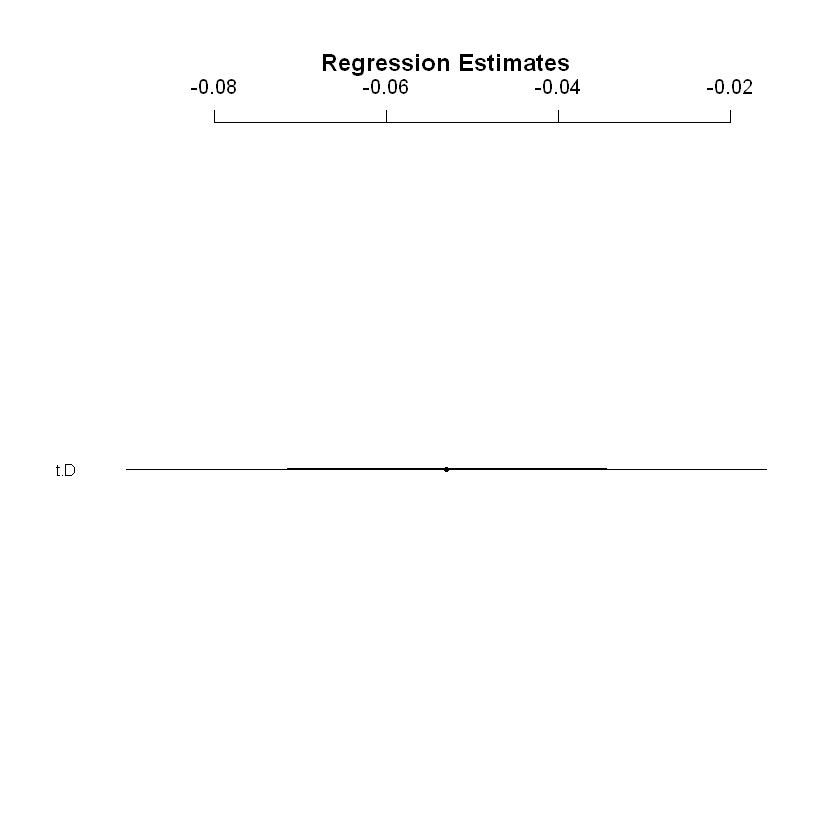

In [185]:
# Interval confidence of sex's coefficient for partialling-out OLS
coefplot(partial.fit)


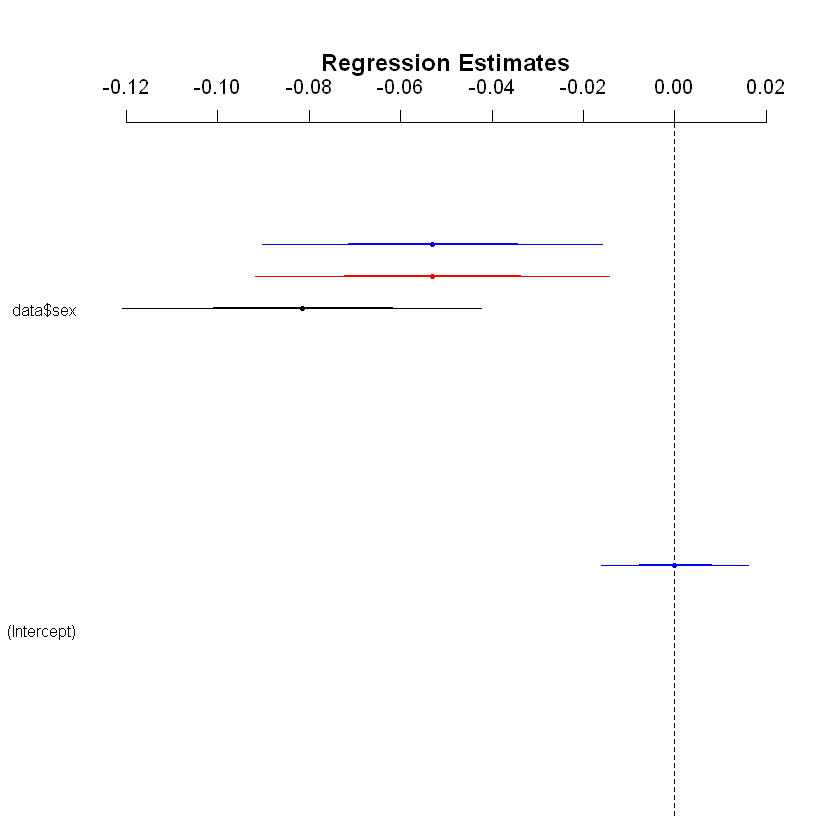

In [210]:
coefplot(nocontrol.fit, xlim=c(-0.12, 0.02),            intercept=TRUE)
coefplot(partial.fit, add=TRUE, col.pts="blue", intercept=TRUE, offset=0.2)
coefplot(control.fit, add=TRUE, col.pts="red", intercept=TRUE)

## Question 5: Proof of the Frisch - Waugh - Lovell Theorem


For the proof of the theorem, we use the following:

The Partialling-out operation

Be the following equation:  𝑉  =  𝛽  𝑊  + e

𝑉̃   =  𝑉  -  𝛼𝑌𝑊  𝑊 
𝛼𝑌𝑊  is the  𝛽̂   (estimated parameter of the regression of V with W)

We're creating a "residual" V by subtracting the part of V that is linearly predicted

This property tells us that from a linear combination of the sum of two vectors it follows that there is a linear combination of the residualized vectors.

𝑌  =  𝑉  +  𝑊   ⟶   𝑌̃   =  𝑉̃   +  𝑊̃  

Then let be the following regression:

𝑌=𝑇𝛽1+𝑋𝛽2+𝑒
 
where,

𝑇 : treatment variable

𝛽1 : parameter that captures the causal effect

𝑋 : other regressors

𝑒 : error

Since we are interested in knowing only the value of  𝛽1 , we partialling-out to both sides of our regression equation:

𝑌̃ =𝑇̃ 𝛽1+𝑋̃ 𝛽2+𝑒̃ 
 
Since the regression is a linear combination, we can obtain a linear equation of the errors estimated by the property defined at the beginning.

Each argument of the equation [2] is the estimated error of the regression of that variable with respect to  𝑋 

𝑌̃   =  𝑌  -  𝛼𝑌𝑋  𝑋 
𝑇̃   =  𝑇  -  𝛼𝑌𝑋  𝑋 
𝑋̃   =  𝑋  -  𝛼𝑋𝑋  𝑋 
𝑒̃   =  𝑒  -  𝛼𝑒𝑋  𝑋 
Some of these estimated error will be deleted because:

𝛼𝑋𝑋  =  𝐼 . So,  𝑋̃   = 0

By definition:  𝐸(𝑒|𝑋)  = 0,  𝛼𝑒𝑋 = 0, and  𝑒̃  = 𝑒 
So the equation [2] reduces to the equation [3]:
𝑌̃ =𝑇̃ 𝛽1+𝑒
 
Finally we come to what F-W-L proves in their theorem: we can reduce the equation [1] containing many regressors on  𝑋  to a simple residual regression (which is defined by partially removing the linear effect of  𝑋  from  𝑌  and  𝑇 ) that only has the parameter that we are interested in estimating.

The estimated parameter  𝛽1  of the equation [1] will be equal to the parameter  𝛽1  that will be estimated in the regression [3].